**Problem 10:	Implement K-means clustering. Use appropriate dataset and evaluate the algorithm.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
sns.set(style="whitegrid", palette="pastel")

In [3]:
# Load the Dataset (Directly from GitHub UCI Repository)
file_path = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
sayem = pd.read_csv(file_path)

In [4]:
print("First 5 Rows of Dataset:")
display(sayem.head())

First 5 Rows of Dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
print("\nℹ Dataset Information:")
sayem.info()


ℹ Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Drop Target Column for Unsupervised Learning
X = sayem.drop('species', axis=1)

In [7]:
# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Elbow Method — Finding the Optimal K
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

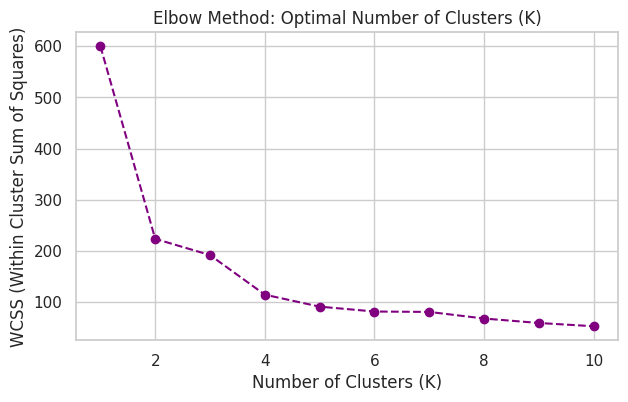

In [10]:
plt.figure(figsize=(7,4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='purple')
plt.title("Elbow Method: Optimal Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [16]:
# Apply K-Means with Optimal K = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
sayem['Cluster'] = kmeans.fit_predict(X_scaled)

/tmp/ipython-input-202819236.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=sayem, palette='cool', ax=ax1)


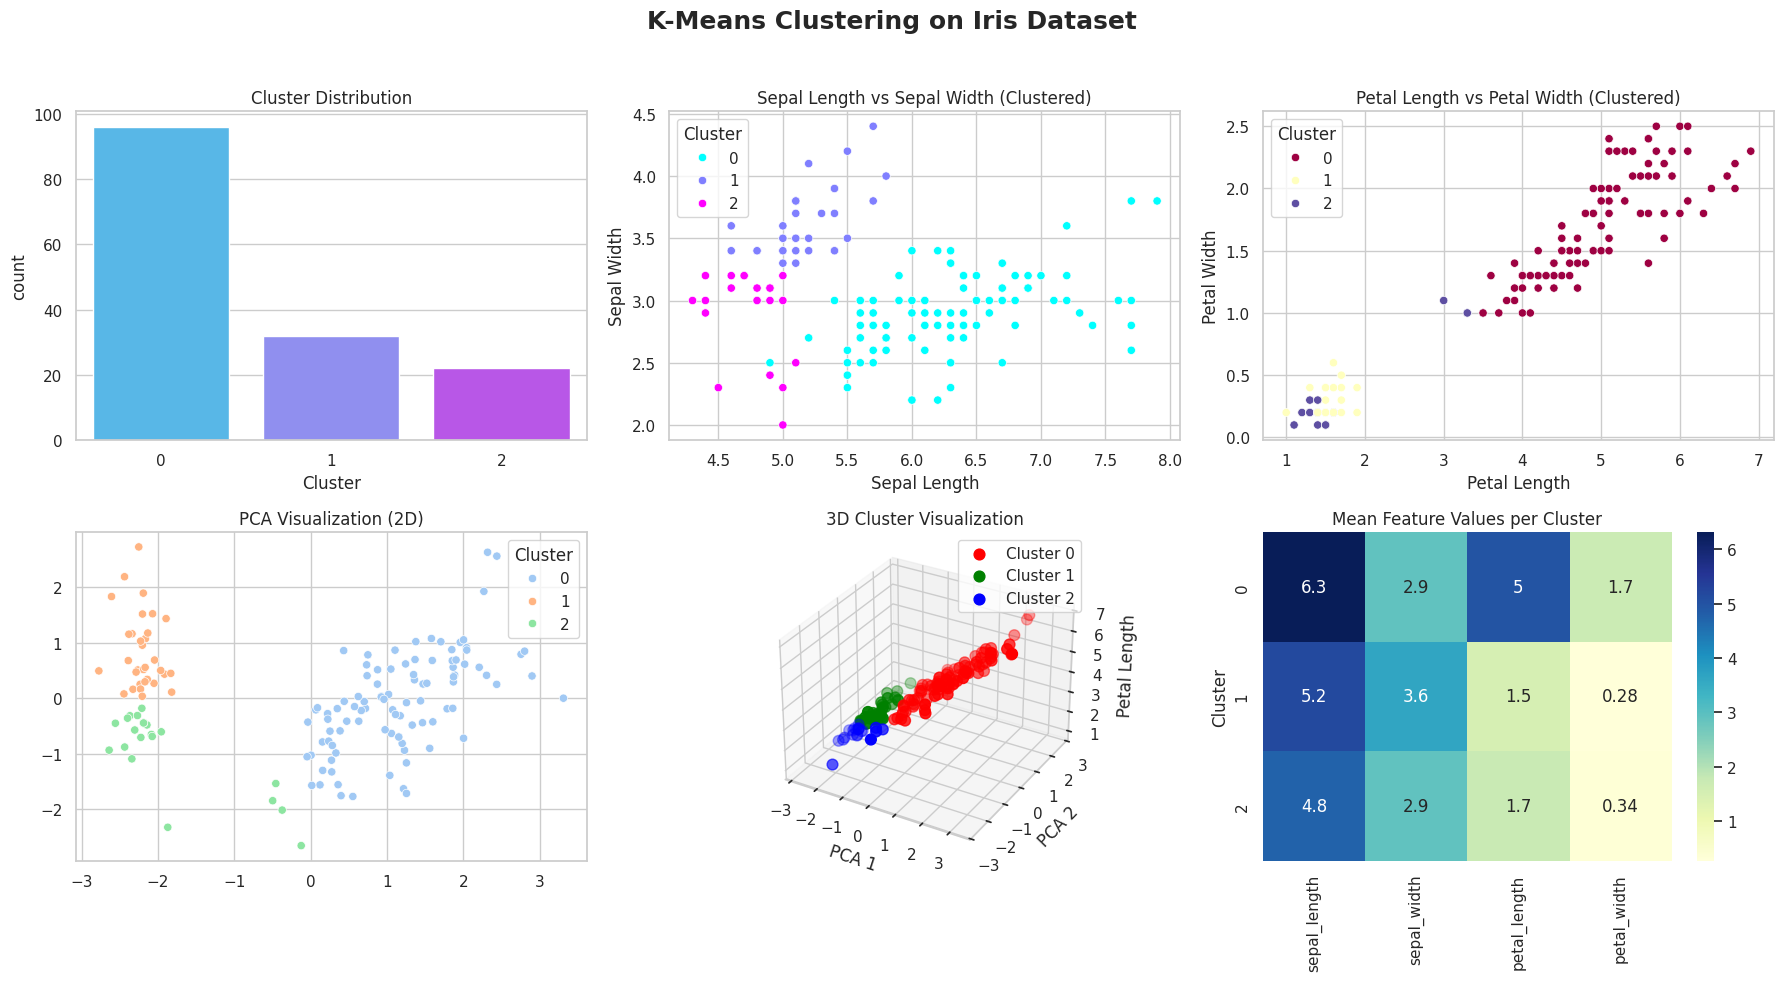

In [23]:
# Visualization Dashboard
fig = plt.figure(figsize=(18,10))
fig.suptitle("K-Means Clustering on Iris Dataset", fontsize=18, fontweight='bold')

# Cluster Distribution
ax1 = plt.subplot2grid((2,3),(0,0))
sns.countplot(x='Cluster', data=sayem, palette='cool', ax=ax1)
ax1.set_title("Cluster Distribution")

# Pairplot View
ax2 = plt.subplot2grid((2,3),(0,1))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=sayem['Cluster'], palette='cool', ax=ax2)
ax2.set_title("Sepal Length vs Sepal Width (Clustered)")
ax2.set_xlabel("Sepal Length")
ax2.set_ylabel("Sepal Width")

# Petal-based Cluster View
ax3 = plt.subplot2grid((2,3),(0,2))
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,3], hue=sayem['Cluster'], palette='Spectral', ax=ax3)
ax3.set_title("Petal Length vs Petal Width (Clustered)")
ax3.set_xlabel("Petal Length")
ax3.set_ylabel("Petal Width")

# PCA Reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
ax4 = plt.subplot2grid((2,3),(1,0))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=sayem['Cluster'], palette='pastel', ax=ax4)
ax4.set_title("PCA Visualization (2D)")

# 3D Visualization
from mpl_toolkits.mplot3d import Axes3D
ax5 = plt.subplot2grid((2,3),(1,1), projection='3d')
colors = ['red','green','blue']
for i in range(3):
    ax5.scatter(X_pca[sayem['Cluster']==i,0],
                X_pca[sayem['Cluster']==i,1],
                np.array(sayem.loc[sayem['Cluster']==i,'petal_length'].values), # Explicitly convert to numpy array
                color=colors[i], label=f'Cluster {i}', s=60)
ax5.set_title("3D Cluster Visualization")
ax5.set_xlabel("PCA 1")
ax5.set_ylabel("PCA 2")
ax5.set_zlabel("Petal Length")
ax5.legend()

# Average Feature Values per Cluster
ax6 = plt.subplot2grid((2,3),(1,2))
cluster_means = sayem.drop('species', axis=1).groupby('Cluster').mean()
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', ax=ax6)
ax6.set_title("Mean Feature Values per Cluster")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [24]:
# Evaluate the Clustering
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_scaled, sayem['Cluster'])
print(f"Silhouette Score: {silhouette:.3f} (Closer to 1 = Better Separation)")

# Compare with true labels (just for reference)
comparison = pd.crosstab(sayem['species'], sayem['Cluster'])
print("\nActual Species vs Cluster Mapping:\n")
display(comparison)

Silhouette Score: 0.479 (Closer to 1 = Better Separation)

Actual Species vs Cluster Mapping:



Cluster,0,1,2
species,,,
setosa,0,32,18
versicolor,46,0,4
virginica,50,0,0


In [25]:
# FINAL SUMMARY
print(f"""
MODEL SUMMARY
Algorithm Used: K-Means Clustering
Dataset: Iris Species (UCI Repository)
Optimal K: 3
Silhouette Score: {silhouette:.3f}

      The K-Means algorithm successfully grouped the Iris data
   into 3 distinct clusters, which closely align with the
   real flower species: Setosa, Versicolor, and Virginica.
""")


MODEL SUMMARY
Algorithm Used: K-Means Clustering
Dataset: Iris Species (UCI Repository)
Optimal K: 3
Silhouette Score: 0.479

      The K-Means algorithm successfully grouped the Iris data
   into 3 distinct clusters, which closely align with the
   real flower species: Setosa, Versicolor, and Virginica.

